## Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

## 💪 Challenge
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

### Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dinosaurs Data

In [7]:
dino_data = pd.read_csv('dinosaurs.csv')

In [8]:
dino_data

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


In [9]:
dino_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


In [10]:
dino_data.describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


### Analysis

__How many different dinosaur names are present in the data?__

In [13]:
dino_data['name'].nunique()

1042

There are 1042 species of dinosaur

__Which was the largest dinosaur? What about missing data in the dataset?__

In [16]:
dino_data[dino_data['length_m']==dino_data['length_m'].max()]['name']

570         Supersaurus
924         Supersaurus
1165    Argentinosaurus
1423        Supersaurus
1972        Supersaurus
Name: name, dtype: object

In [17]:
dino_data['class'].nunique()

2

In [18]:
dino_data['family'].nunique()

75

In [19]:
dino_data.groupby('family')['length_m'].mean().dropna()

family
Abelisauridae             6.193103
Allosauridae             12.000000
Alvarezsauridae           2.000000
Anchisauridae             5.000000
Ankylosauridae            6.666216
Archaeopterygidae         2.000000
Brachiosauridae          24.306667
Caenagnathidae            1.754167
Carcharodontosauridae    14.312500
Caudipterygidae           1.000000
Ceratopsidae              7.567782
Chaoyangsauridae          1.150000
Compsognathidae           1.480000
Dicraeosauridae          19.100000
Diplodocidae             23.908451
Dromaeosauridae           1.706095
Dryosauridae              3.718750
Guaibasauridae            1.800000
Hadrosauridae             9.900365
Herrerasauridae           3.315789
Heterodontosauridae       1.200000
Hypsilophodontidae        2.300000
Iguanodontidae            7.000000
Leptoceratopsidae         3.000000
Mamenchisauridae         21.791667
Massospondylidae          4.576271
Megalosauridae            9.200000
Metriacanthosauridae      9.640000
Nemegtosaurid

In [20]:
dino_data.groupby(['type', 'family'])['length_m'].mean().dropna()

type              family               
armored dinosaur  Ankylosauridae            6.666216
                  Nodosauridae              4.907071
                  Stegosauridae             7.551724
ceratopsian       Ceratopsidae              7.567782
                  Chaoyangsauridae          1.150000
                  Leptoceratopsidae         3.000000
                  Protoceratopsidae         0.500000
                  Psittacosauridae          2.000000
large theropod    Abelisauridae             6.193103
                  Allosauridae             12.000000
                  Carcharodontosauridae    14.312500
                  Dromaeosauridae           5.666667
                  Herrerasauridae           2.000000
                  Megalosauridae            9.200000
                  Metriacanthosauridae      9.640000
                  Neovenatoridae            6.400000
                  Ornithomimidae            4.761538
                  Piatnitzkysauridae        5.550000
      

__What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...)__

In [76]:
dino_data['name'].value_counts().head(10)

name
Richardoestesia      151
Saurornitholestes    136
Triceratops          125
Iguanodon            111
Troodon              111
Allosaurus           103
Camarasaurus         102
Paronychodon          99
Tenontosaurus         74
Tyrannosaurus         74
Name: count, dtype: int64

<Axes: xlabel='name', ylabel='count'>

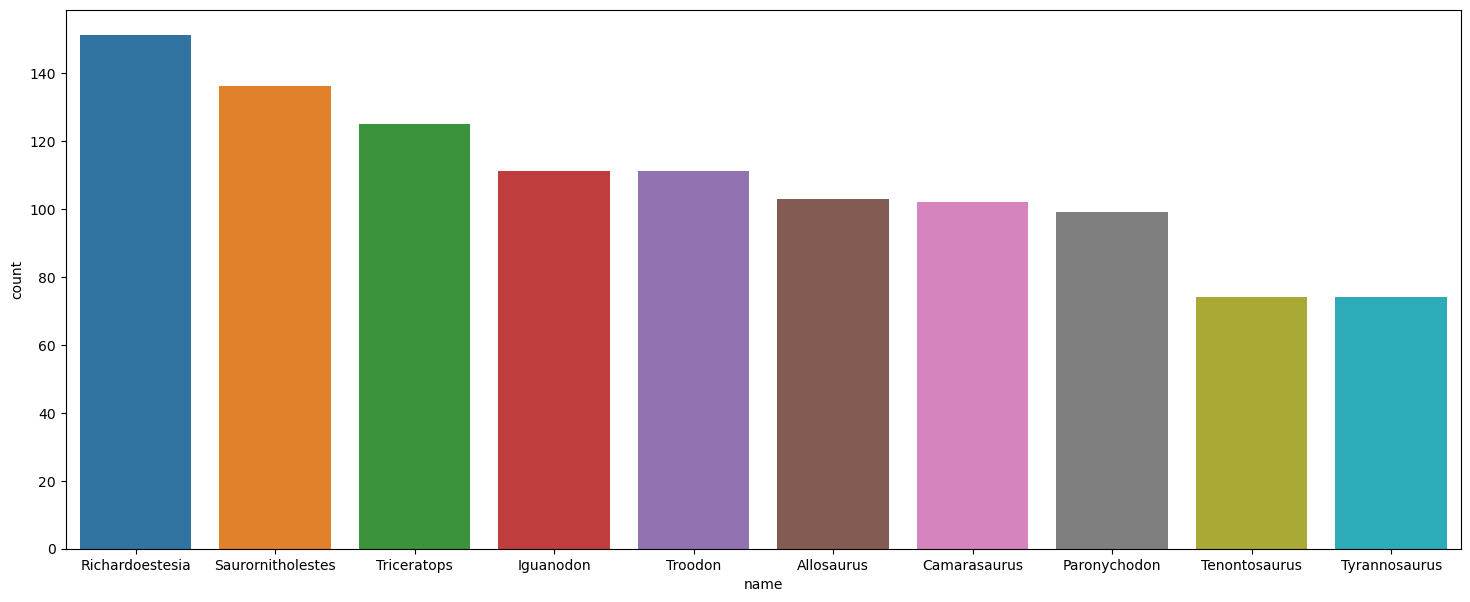

In [74]:
plt.figure(figsize=(18,7))
sns.countplot(data=dino_data, x='name', order=dino_data['name'].value_counts().head(10).index)

__Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.__

D:\App\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


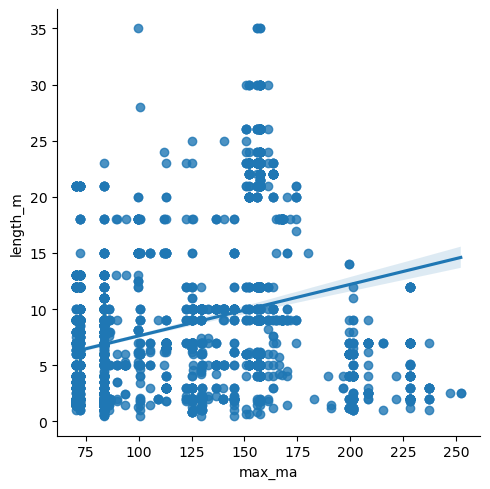

In [148]:
sns.lmplot(x='max_ma', y='length_m', data=dino_data)

D:\App\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


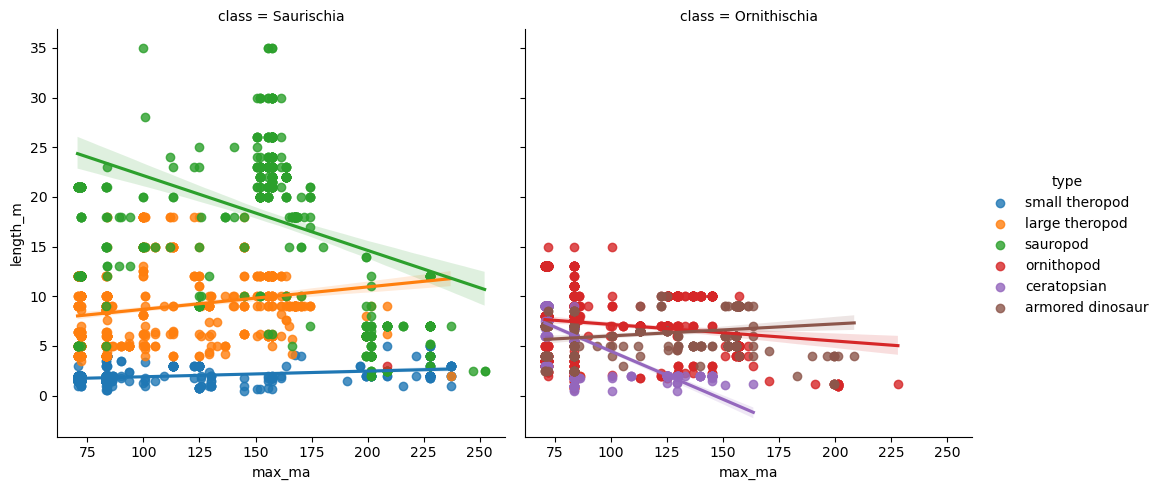

In [154]:
sns.lmplot(x='max_ma', y='length_m', data=dino_data, col='class', hue='type')

Overall, the dinosaur get smaller over time

__Relationship between diet and dinosaur's size__

<Axes: xlabel='diet', ylabel='length_m'>

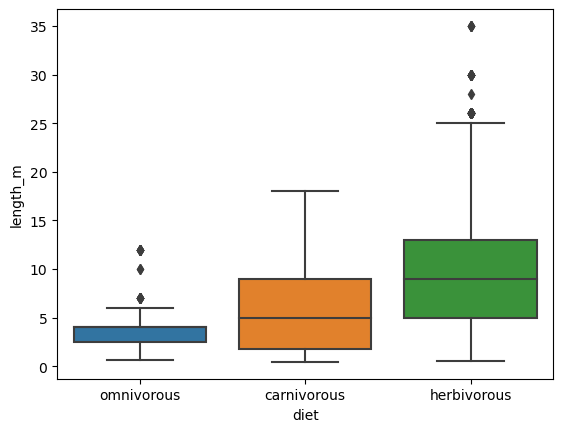

In [199]:
sns.boxplot(data=dino_data, x='diet',y='length_m')

the herbivorous dinosaur is tend to bigger than the carnivore. it the same as modern animal
the omnivorous is the smallest

In [227]:
dino_data[dino_data['diet']=='omnivorous']['name'].nunique()

26

In [217]:
dino_data[dino_data['diet']=='omnivorous']['name'].unique()

array(['Protarchaeopteryx', 'Caudipteryx', 'Massospondylus',
       'Yunnanosaurus', 'Thecodontosaurus', 'Melanorosaurus',
       'Gallimimus', 'Shuvuuia', 'Citipati', 'Khaan', 'Deinocheirus',
       'Nanshiungosaurus', 'Ornithomimus', 'Chirostenotes',
       'Struthiomimus', 'Avimimus', 'Harpymimus', 'Coloradisaurus',
       'Nothronychus', 'Heyuannia', 'Oviraptor', 'Hagryphus',
       'Erlikosaurus', 'Beipiaosaurus', 'Garudimimus', 'Nomingia'],
      dtype=object)

In [225]:
dino_data[dino_data['diet']=='carnivorous']['name'].nunique()

92

In [219]:
dino_data[dino_data['diet']=='carnivorous']['name'].unique()

array(['Gorgosaurus', 'Albertosaurus', 'Daspletosaurus', 'Tyrannosaurus',
       'Mononykus', 'Tarbosaurus', 'Allosaurus', 'Dilophosaurus',
       'Velociraptor', 'Coelophysis', 'Liliensternus', 'Troodon',
       'Chindesaurus', 'Dromaeosaurus', 'Saurornitholestes',
       'Richardoestesia', 'Dryptosaurus', 'Eoraptor', 'Herrerasaurus',
       'Carcharodontosaurus', 'Spinosaurus', 'Elaphrosaurus',
       'Acrocanthosaurus', 'Segisaurus', 'Deltadromeus', 'Carnotaurus',
       'Indosuchus', 'Utahraptor', 'Paronychodon', 'Irritator',
       'Coelurus', 'Dubreuillosaurus', 'Giganotosaurus', 'Aucasaurus',
       'Piatnitzkysaurus', 'Megalosaurus', 'Abelisaurus', 'Majungasaurus',
       'Deinonychus', 'Compsognathus', 'Fukuiraptor', 'Yangchuanosaurus',
       'Gasosaurus', 'Ceratosaurus', 'Conchoraptor', 'Borogovia',
       'Noasaurus', 'Saurornithoides', 'Sinraptor', 'Baryonyx',
       'Proceratosaurus', 'Torvosaurus', 'Neovenator', 'Monolophosaurus',
       'Cryolophosaurus', 'Masiakasaurus

In [229]:
dino_data[dino_data['diet']=='herbivorous']['name'].nunique()

183

In [223]:
dino_data[dino_data['diet']=='herbivorous']['name'].unique()

array(['Isisaurus', 'Amygdalodon', 'Camarasaurus', 'Diplodocus',
       'Amargasaurus', 'Apatosaurus', 'Brontosaurus', 'Kotasaurus',
       'Barosaurus', 'Plateosaurus', 'Mamenchisaurus', 'Aegyptosaurus',
       'Rebbachisaurus', 'Pantydraco', 'Cetiosaurus', 'Shunosaurus',
       'Patagosaurus', 'Vulcanodon', 'Barapasaurus', 'Aragosaurus',
       'Hypselosaurus', 'Euhelopus', 'Opisthocoelicaudia',
       'Chubutisaurus', 'Datousaurus', 'Malawisaurus', 'Rhoetosaurus',
       'Brachiosaurus', 'Haplocanthosaurus', 'Saltasaurus', 'Alamosaurus',
       'Supersaurus', 'Jingshanosaurus', 'Omeisaurus', 'Lufengosaurus',
       'Giraffatitan', 'Paralititan', 'Dicraeosaurus', 'Janenschia',
       'Anchisaurus', 'Ampelosaurus', 'Chinshakiangosaurus',
       'Brachytrachelopan', 'Antarctosaurus', 'Europasaurus',
       'Lapparentosaurus', 'Guaibasaurus', 'Quaesitosaurus',
       'Argentinosaurus', 'Mussaurus', 'Riojasaurus', 'Bellusaurus',
       'Cetiosauriscus', 'Yimenosaurus', 'Erketu', 'Nigersa